In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statistics
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [8]:
### Solution Pseudo Code
def algorithm(x, y, m, b, L, epochs = 1000):
    # Initialize error array
    for i in range(epochs):
        # Define model: f(x) = mx - b
        # Calculate the partial derivative of the loss function w.r.t m
        # Calculate the partial derivative of the loss function w.r.t b
        m = m - L * dldm # Update m
        b = b - L * dldb # Update b
        err[i] = sum(abs(y_pred - y)) or sum(abs(y_pred - y))**(1/2) # Calculate error
    return m, b, err # Return calculated coefficients and error (array)
###

In [28]:
#I Regression algorithm implementation

#Problem 1
#Part I: Gradient Descent for Mean absolute error

def gradientDescent_Mean(x,y,m,b,l, epochs = 1000):
    err = np.zeros(epochs);                            #initizlize error erray
    for i in range(epochs):
            func = m*x - b                             #f(x) = mx - b Prediction
            dldm = sum(x * (func - y) / abs(func - y)) # Calculate the partial derivative of the loss function w.r.t m
            dldb = sum(x * (func + y) / abs(func + y)) # Calculate the partial derivative of the loss function w.r.t b
            m = m - l * dldm                           # Update m
            b = b - l * dldb                           # Update b
            err[i] = sum(abs(func - y))                # Calculate error
    return m , b ,err

In [49]:
#Part II:
#Gradient descent Least Squared Error

def gradientDescent_Least(x,y,m,b,l, epochs = 1000):
    err = np.zeros(epochs);                            #initizlize error erray
    for i in range(epochs):
            func = m*x - b                             #f(x) = mx - b Prediction
            dldm = (1/2) * sum(abs(func - y)) ** (-1/2) * sum(x * (func - y) / abs(func - y))  # Calculate the partial derivative of the loss function w.r.t m
            dldb = (1/2) * sum(abs(func - y)) ** (-1/2) * sum(x * (-func + y) / abs(func + y))  # Calculate the partial derivative of the loss function w.r.t b
            m = m - l * dldm                           # Update m
            b = b - l * dldb                           # Update b
            err[i] = sum(abs(func - y))**(1/2)         # Calculate error
    return m , b , err

In [43]:
#Problem 1
#part II
#Plot L_1, L_2 errors as a function of number of iterations of your algorithm.

#data
df_1 = pd.read_csv('almost_linear.csv')

#Isolate data, split data TV vs sales
split_1 = df_1.loc[:,'sales'].values.reshape(-1,1) #sales data
split_2 = df_1.loc[:,'TV'].values.reshape(-1,1)    #TV data

#training/data sets
x_train, x_test, y_train, y_test = train_test_split(split_1, split_2, test_size = .3)

#initial guess
m0 = 20
b0 = 5

#learning rate
L = [.001, .002, .003]


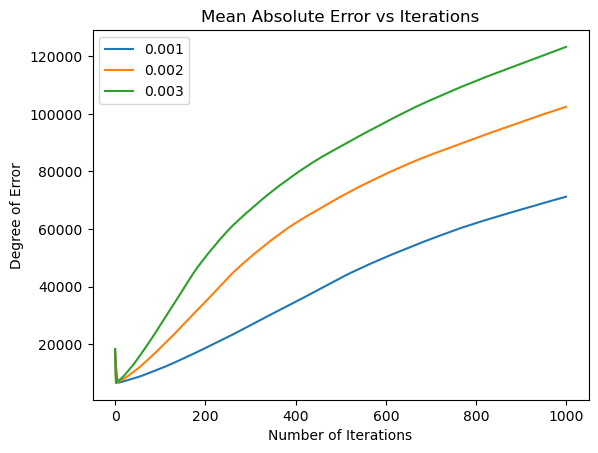

In [66]:
#train data while plotting guesses (gradient descent mean abs)
for i in range (len(L)):
    m1, b1, mean = gradientDescent_Mean(x_train, y_train, m0, b0, L[i], epochs = 1000);
    plt.plot(mean);
plt.title('Mean Absolute Error vs Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Degree of Error')
plt.legend(L)

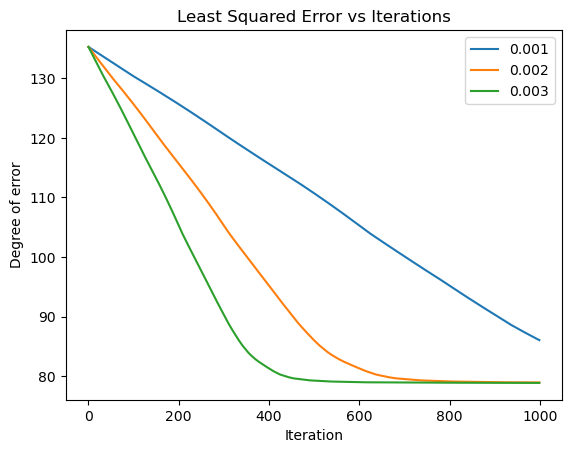

In [65]:
#train data while plotting guesses (gradient descent least squared)
for i in range (len(L)):
    m2, b2, least = gradientDescent_Least(x_train, y_train, m0, b0, L[i], epochs = 1000);
    plt.plot(least);
plt.title('Least Squared Error vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Degree of error')
plt.legend(L)

In [26]:
#df_1
#split_1
#split_2

In [ ]:
#Problem 3
#Compare your results with a standard linear regression solver 

In [ ]:
#II Model Selection
#1. Explore the data.  Plot the distribution of median house value.   
#   Plot median house value vs total bedrooms. Plot the correlation matrix.  
#.  Discuss plot results. 

df = pd.read_csv('cal_housing.data')
df.columns = ('longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue')

sns.histplot(data = df, x = 'medianHouseValue').set(title = 'Median House Value Distribution', 
                                                                       xlabel = 'Count', 
                                                                       ylabel = 'Price USD');

In [ ]:
#df
sns.scatterplot(data = df, x = 'totalRooms', y = 'medianHouseValue').set(title = 'Median House Value vs Total Bedrooms');
plt.yscale('log')
plt.xscale('log')

In [ ]:
corr = df.corr()
sns.heatmap(corr).set(title = 'Correlation Matrix of Housing Data');

In [ ]:
#Question 2
#linear regression models
#lasso
#ridge
#elasric net
Las = linear_model.Lasso()
Rid = linear_model.Ridge()
Elastic = linear_model.ElasticNet()